In [3]:
import matplotlib.pyplot as plt 
import pandas as pd
import seaborn as sns

beer_df = pd.read_csv('/home/steve/Vorlesungen/Artificial_Intelligence_Burghart/KI-Projekt-RKIM22-23/analysis/feature_list_hu100_255.csv')
beer_df

Aspect Ratio  seal_position      Hu_0      Hu_1       Hu_2  Cap_Hu_0  \
0         0.346059       0.798030  2.749615  5.835177   9.368245  2.481728   
1         0.325332       0.072061  2.543913  5.293344   9.289297  2.895178   
2         0.333666       0.859000  2.713125  5.709118   9.333523  2.768251   
3         0.240161       0.053055  2.569185  5.262478  10.773912  2.907394   
4         0.286703       0.074615  2.510118  5.168783  10.114466  2.801010   
...            ...            ...       ...       ...        ...       ...   
1311      0.257469       0.737500  2.532253  5.198429   9.705878  2.838155   
1312      0.344426       0.886023  2.529391  5.318901   8.756379  2.808702   
1313      0.245066       0.627467  2.534453  5.180412   9.512405  2.976998   
1314      0.250633       0.720886  2.383108  4.892251   9.048462  2.729412   
1315      0.232606       0.574247  2.319903  4.768716   7.673540  2.874124   

      Cap_Hu_1   Cap_Hu_2               Label  
0     6.147925   7.933192  closed_seal_broken  
1     7.071702  10.767847  closed_seal_broken  
2     5.960578   9.711945  closed_seal_broken  
3     7.391706  11.781087  closed_seal_broken  
4     7.428056  10.968305  closed_seal_broken  
...        ...        ...                 ...  
1311  9.008578  10.990964         open_broken  
1312  6.607302   9.863787         open_broken  
1313  8.034627  11.348906         open_broken  
1314  7.640289  11.834792         open_broken  
1315  7.732395  10.111730         open_broken  

[1316 rows x 9 columns]

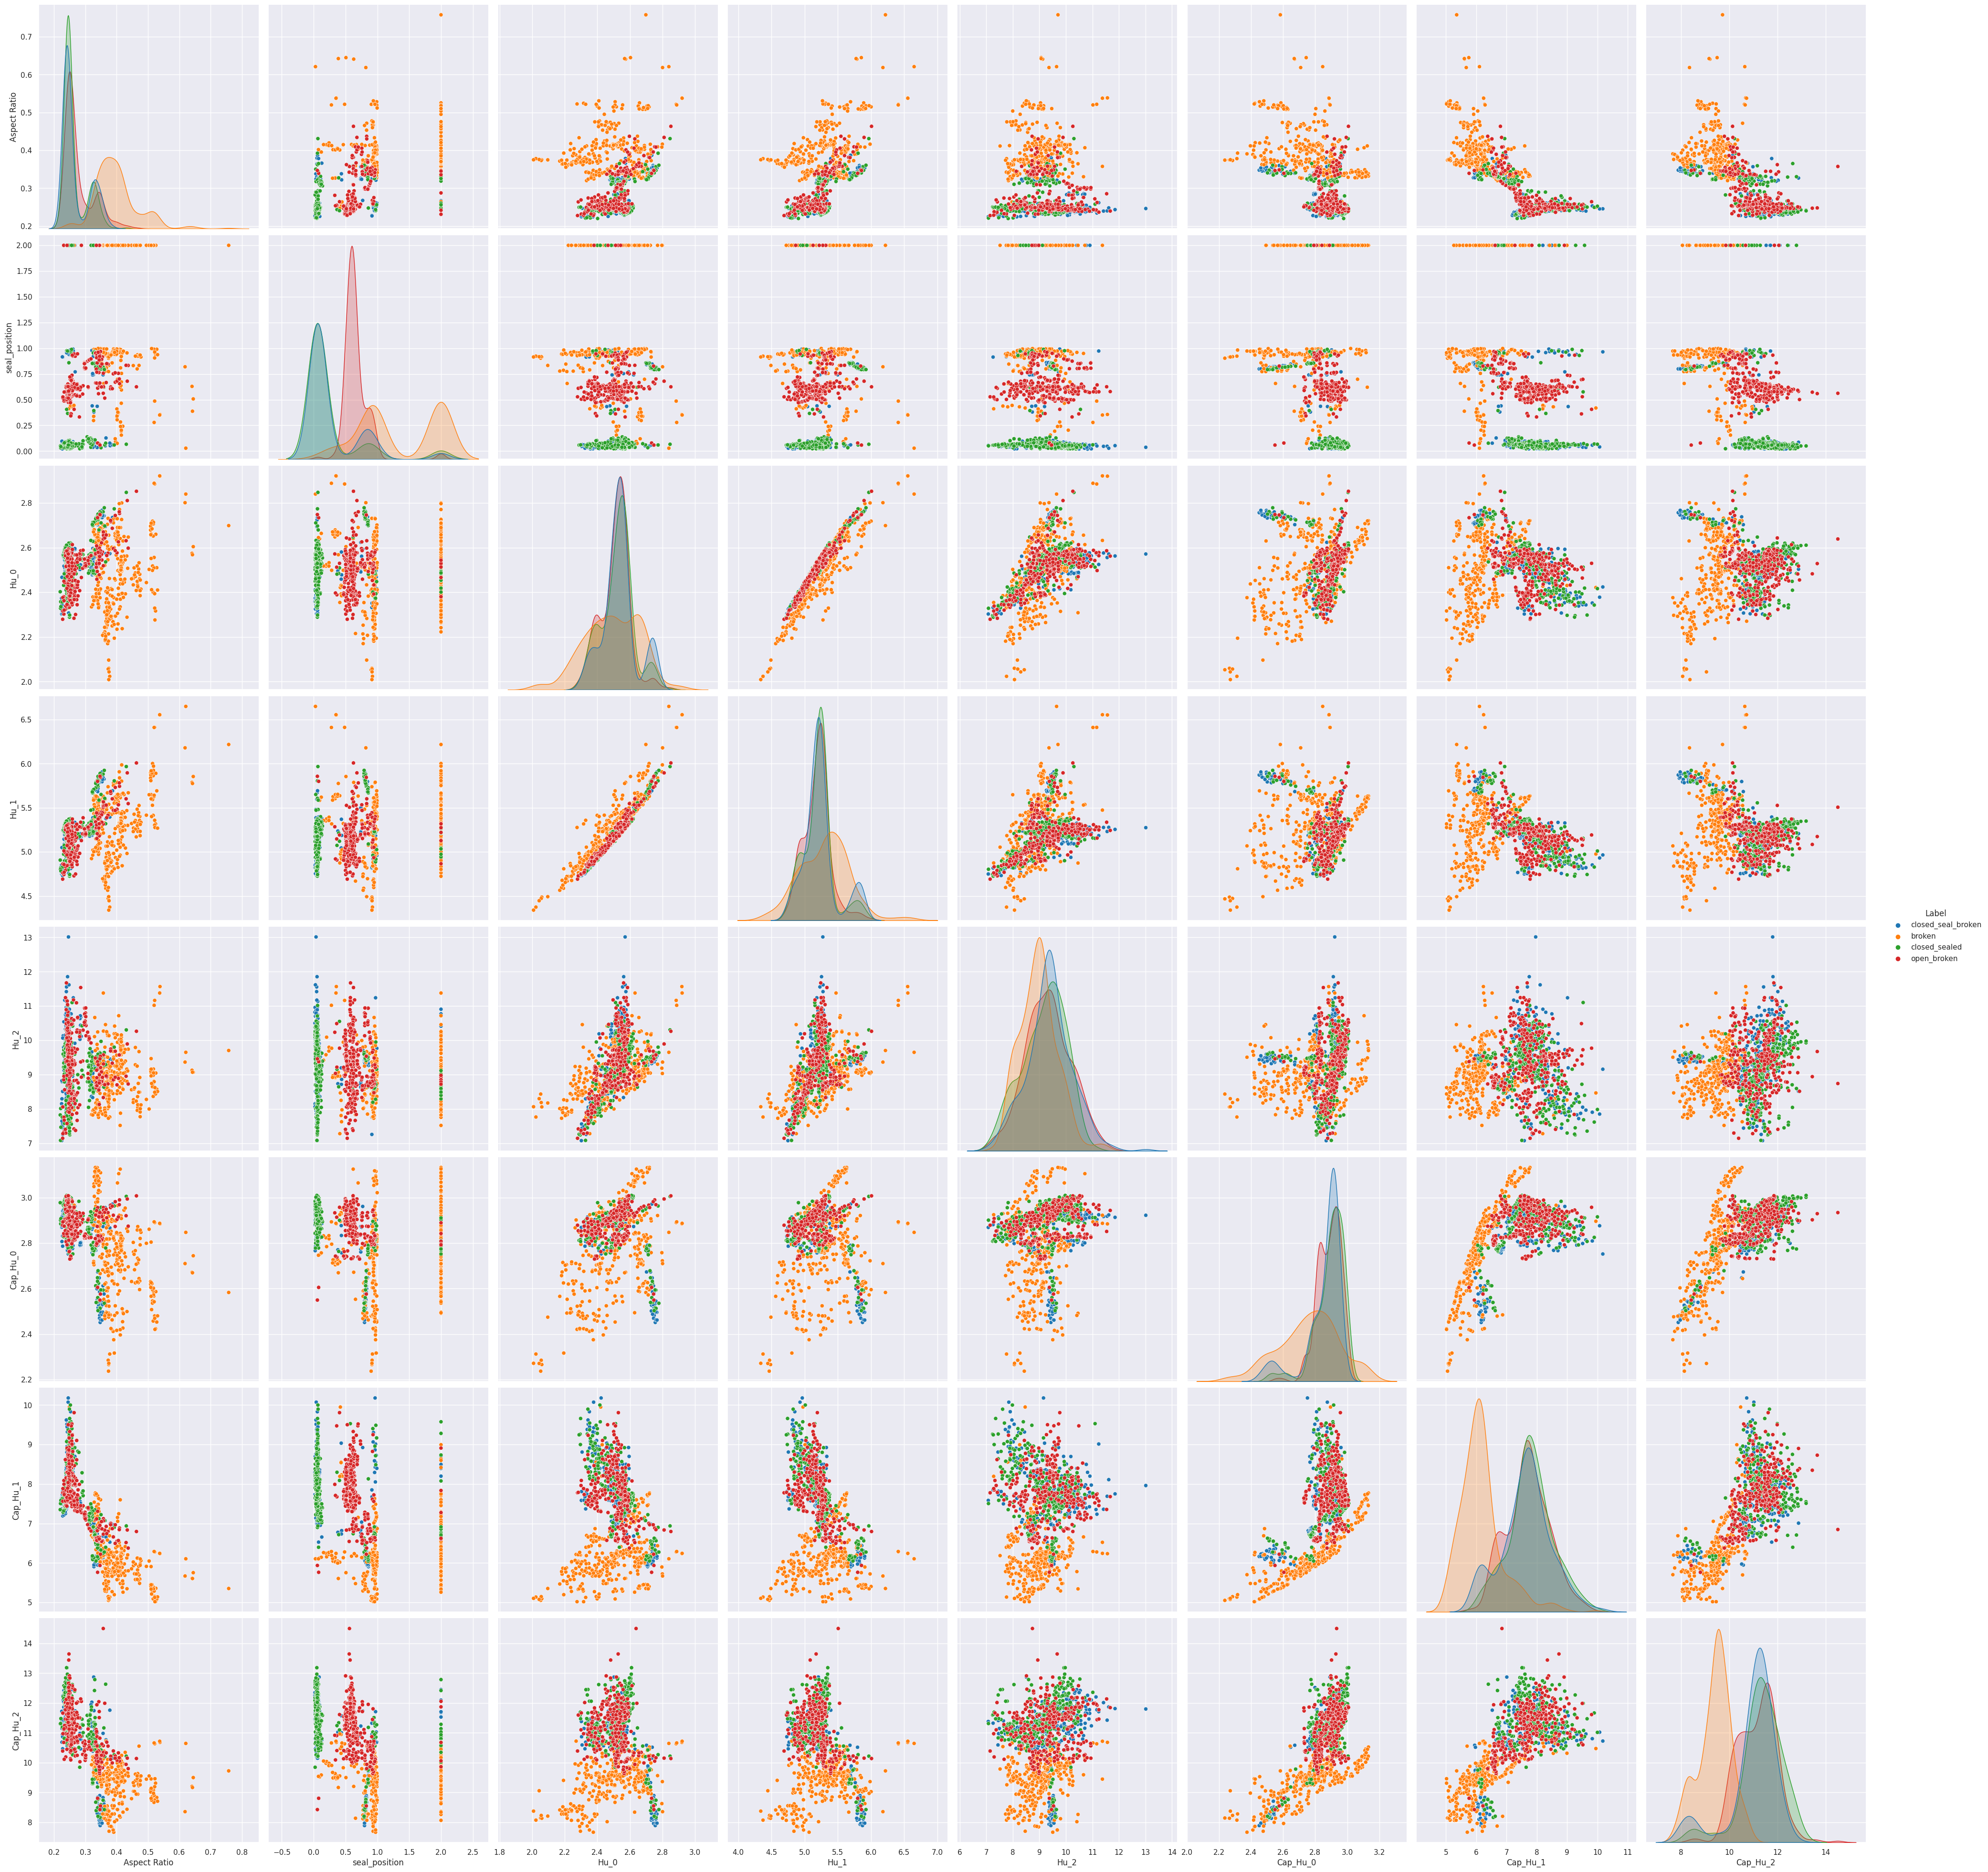

In [4]:
#data.plot.scatter(x='hu0',y='label')

sns.set_theme(style="darkgrid")
plot = sns.pairplot(beer_df, hue ="Label",palette="tab10", height= 5)


In [15]:
# Teilen des Datensatzes in Features und Labels. Hierfür kann die Funktion iloc der Bibliothek Pandas verwendet werden. 

# alles außer die letzte Spalte
#TODO 
data = beer_df.iloc[:,:-1]
#data
# nur die letzte Spalte  
#TODO 
label = beer_df.iloc[:,-1]
label


0       closed_seal_broken
1       closed_seal_broken
2       closed_seal_broken
3       closed_seal_broken
4       closed_seal_broken
               ...        
1311           open_broken
1312           open_broken
1313           open_broken
1314           open_broken
1315           open_broken
Name: Label, Length: 1316, dtype: object

In [16]:
from sklearn.decomposition import PCA 

# initialisieren der PCA mit 2 komponenten/features
beer_pca = PCA(n_components=3)

# Bestimmen der Hauptkomponenten
beer_pca.fit(data)

# Transformieren des Datensatzes auf die neuen Features
data_pca = beer_pca.transform(data)

In [17]:
# aufteilen des Datensatzes in Train- und Testdaten
from sklearn.model_selection import train_test_split

# aufteilen des Datenstatzes unter verwendung der funktion train_test_split
# TODO 
data_train, data_test, label_train, label_test = train_test_split(data_pca,label, test_size=0.2,
                                                   random_state=42)

print('data_train: ',data_train.shape, 'label_train: ', data_train.shape)
print('data_test: ', data_test.shape, 'label_test: ', data_test.shape)

data_train:  (1052, 3) label_train:  (1052, 3)
data_test:  (264, 3) label_test:  (264, 3)


In [18]:
# Initalisieren des Klassifikators
from sklearn.naive_bayes import GaussianNB # importiere Bayes-Klassifikator
bayes_clf = GaussianNB()# Instazieren des Klassifikators 

# trainieren des Klassifikators mit den Trainingsdaten
#TODO # Wende Klassifikator auf Trainingsdaten an
bayes_clf.fit(data_train,label_train);


In [19]:
# importieren der benötigten Bibliotheken 
from sklearn.metrics import confusion_matrix, classification_report

# Schnelles ausgeben der Accuracy des Klassifikators mit der Funktion .score
# TODO
print("Score ist:" ,bayes_clf.score(data_test, label_test))

#***************************************************************
# Ausgeben der Konfusions Matrix 
# Vorhersagen der Klassen mit dem Testdatensatz mit .predict
# TODO  
y_pred_test = bayes_clf.predict(data_test) #wende Modell (Bayes) auf testdaten an, werden klassifiziert
#Ausgeben einer Konfusionsmatrix mit den vorhergesagten Werten und den wahren (Testdaten) Werten
# TODO
print(confusion_matrix(label_test,y_pred_test)) #vergleiche testdaten mit vorhergesagten Daten

#***************************************************************
# Ausgeben des Classifikation Reports mit den vorhergesagten Werten und den wahren (Testdaten) Werten
# TODO 

print(classification_report(y_pred_test,label_test))

Score ist: 0.5113636363636364
[[60  3  2  5]
 [ 5 44  8  7]
 [ 7 38 11  6]
 [ 9 33  6 20]]
                    precision    recall  f1-score   support

            broken       0.86      0.74      0.79        81
closed_seal_broken       0.69      0.37      0.48       118
     closed_sealed       0.18      0.41      0.25        27
       open_broken       0.29      0.53      0.38        38

          accuracy                           0.51       264
         macro avg       0.50      0.51      0.48       264
      weighted avg       0.63      0.51      0.54       264



In [20]:
from sklearn.decomposition import PCA 

# initialisieren der PCA mit 2 komponenten/features
beer_pca = PCA(n_components=2)

# Bestimmen der Hauptkomponenten
beer_pca.fit(data)

# Transformieren des Datensatzes auf die neuen Features
data_pca = beer_pca.transform(data)